# Dyna-Q implementation and reproduction of blocking/shortcut maze experiments

3 files were written:

1) blocking_shortcut_mazes.py -- modified pycolab code

2) DynaQ.py -- DynaQ/Q+ implementation and other methods used below

3) animations.py -- Animation I made to visualize training

In [16]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import DynaQ # Dyna-Q implementation is here. 
import animations # To visualize an experiment

Populating the interactive namespace from numpy and matplotlib


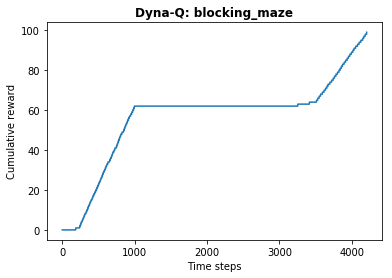

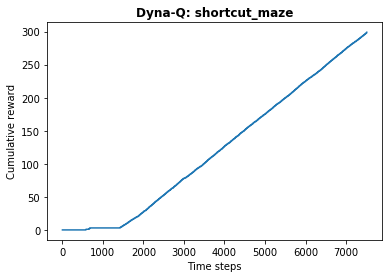

In [18]:
action_lists = {}
for game_name in ['blocking_maze', 'shortcut_maze']:

    dynaplus = 0 # 1 if want dyna_plus
    n_episodes = 100 if game_name == 'blocking_maze' else 300

    cumulative_rewards, action_lists[game_name] = DynaQ.DynaQ(game_name, 
                                                  n_episodes=n_episodes,
                                                  eps=0.2,
                                                  alpha=0.2,
                                                  n=10,
                                                  dynaplus=dynaplus)
    plt.plot(cumulative_rewards)
    if dynaplus == 1:
        plt.title('Dyna-Q+: %s'%game_name, fontweight='bold')
    else:
        plt.title('Dyna-Q: %s'%game_name, fontweight='bold')

    plt.xlabel('Time steps')
    plt.ylabel('Cumulative reward')

    plt.show()

## Animations
Below are animations that I made to visualize the progression of the above algorithms. 

User must pass a list of action-lists as first parameter.

Actions in each action-list are one of:
- 0 = UP
- 1 = DOWN
- 2 = LEFT
- 3 = RIGHT
- -1 = DID NOT MOVE
- -2 = END OF EPISODE
- -3 = CHANGE OF ENVIRONMENT

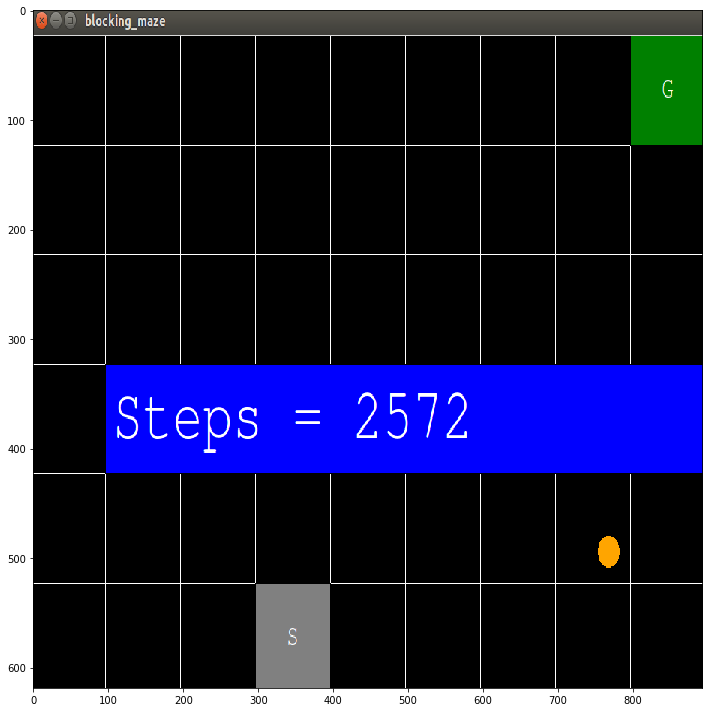

In [14]:
# Example of animation below
img=mpimg.imread('./images/animation_sample.png')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(img, aspect='auto')
plt.tight_layout()
plt.show()

In [19]:
# Visualize blocking maze experiment
game_name = 'blocking_maze'
animations.animate(action_lists[game_name], envt=game_name)

In [22]:
# Visualize shortcut maze experiment
game_name = 'shortcut_maze'
animations.animate(action_lists[game_name], envt=game_name)

## Cumulative reward as a function of time steps averaged over multiple experiments
Averaged over 100, 300 experiments for blocking maze, shortcut_maze respectively. 

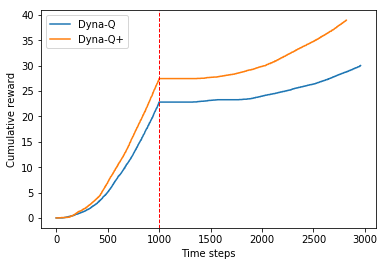

In [20]:
DynaQ.plot_avg_cumulative_rewards(num_layers=30, game_name='blocking_maze')

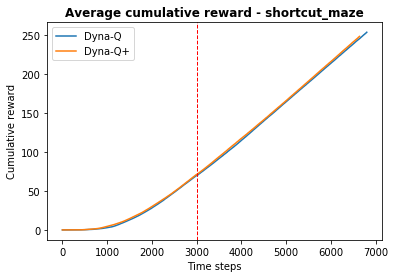

In [2]:
DynaQ.plot_avg_cumulative_rewards(num_layers=30, game_name='shortcut_maze')

## Exploring hyperparameters
In make_hyperparam_graph() function, set toy=True for toy example on 8 hyprerparameters. 

If toy=False, will run on 1000 combinations. Attached is the plot for 1000 hyperparameter combinations.

Order of hyperparameter combinations (1000) is stored in a file in current directory 'hyperparams_1000.sorted'.

eps, alpha, n
Combination 0/8 -- (0.1, 0.1, 0)
Combination 1/8 -- (0.1, 0.1, 10)
Combination 2/8 -- (0.1, 0.9, 0)
Combination 3/8 -- (0.1, 0.9, 10)
Combination 4/8 -- (0.9, 0.1, 0)
Combination 5/8 -- (0.9, 0.1, 10)
Combination 6/8 -- (0.9, 0.9, 0)
Combination 7/8 -- (0.9, 0.9, 10)


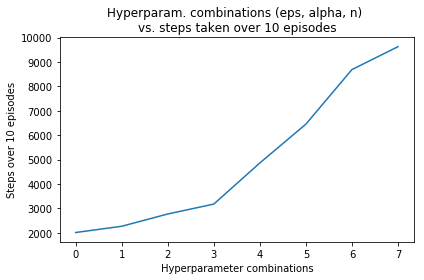

In [2]:
DynaQ.make_hyperparam_graph(game_name='blocking_maze', toy=True)

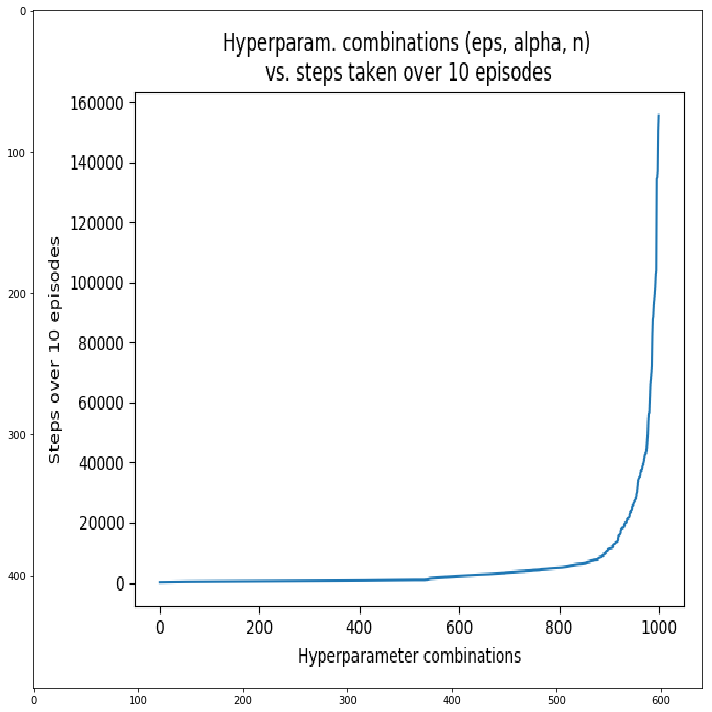

In [20]:
# Precomputed this over 1000 combinations as it takes a long time. 
img=mpimg.imread('./images/hyperparams.png')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(img, aspect='auto')
plt.tight_layout()
plt.show()

# Deterministic model update in Dyna-Q vs. experience replay

"How is the above deterministic model update in Dyna-Q related to experience replay?" 

Similarities:
- Both these methods make more efficient use of previous experience, by learning with it more than once.


- Both methods improve learning speed.


Differences:
- Dyna-Q will uniformly randomly sample a state-action pair that has been previously observed. 


- Experience replay will store most recent N observations and randomly sample a state-action pair such that the state is sampled with an exponentially decaying probability and the action at that state is followed according to current policy. 


- In Dyna-Q during planning, it is possible to sample a state-action pair that does not follow the current policy, but that was chosen according to a previous policy. 


- In experience replay, this is not possible as we only sample state actions from our memory-buffer that follow our current policy. 


- In Dyna-Q, as you gather more observations, you increase the size of the state-action space which reduces the probability of a particular (S,A) being sampled as the algorithm progresses. 


- In experience replay, the new observations overwrite the previous observations from the same state since we are storing only the N most recent observations and so probability of sampling a particular observations is not directly related to the size of the state-action space.


- This is favorable in a stochastic environment as we are sampling from recent memories with higher probability than older memories. An action learned many steps ago is less likely to be relevant that one that happened at the previous step, since the environment is constantly changing over time. 